In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [34]:
df = pd.read_csv(r'C:\Users\91948\OneDrive\Desktop\true tech\Startups Success Rate Prediction\startup data.csv')
df

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,...,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,...,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,...,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,...,c:33198,0,0,1,1,0,0,1.0000,1,acquired


#  Doing Some Basic EDA

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [36]:
df.shape

(923, 49)

In [37]:
df.describe()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,...,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,...,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


In [38]:
df.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

In [39]:
df.size

45227

In [41]:
df.isnull().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

In [42]:
df.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

In [43]:
df.dropna(inplace = True)

In [44]:
df.duplicated().sum()

0

# droping unwanted_columns which is not required for  model building

In [45]:
df.drop(['city','Unnamed: 6','name','founded_at','closed_at','first_funding_at','last_funding_at'],axis = 1,inplace = True)

In [46]:
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
4,1002,CA,37.779281,-122.419236,94105,c:65806,0,0.0000,1.6685,0.0384,...,c:65806,1,1,0,0,0,0,1.0,1,closed
5,379,CA,37.406914,-122.090370,94043,c:22898,0,4.5452,4.5452,5.0027,...,c:22898,0,0,0,1,0,0,3.0,1,closed
30,355,CA,37.422859,-122.045217,94035,c:21492,0,1.3534,2.1644,4.5178,...,c:21492,0,0,1,1,0,0,2.0,1,closed
35,785,NY,40.739010,-73.997259,10011,c:45111,0,2.6575,2.6575,0.0000,...,c:45111,0,0,0,1,0,0,1.0,1,closed
60,617,MA,42.546483,-71.173667,1887,c:35157,0,2.7836,10.9507,-1.9151,...,c:35157,0,0,0,1,0,0,2.0,1,closed


In [47]:
df.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'labels', 'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'state_code.1',
       'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 'category_code',
       'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

In [48]:
df['status'].unique()

array(['closed', 'acquired'], dtype=object)

now we can replace closed with 0 and acquired in 1

In [52]:
df.replace({'closed':0,'acquired':1},inplace = True)

<AxesSubplot:xlabel='status', ylabel='count'>

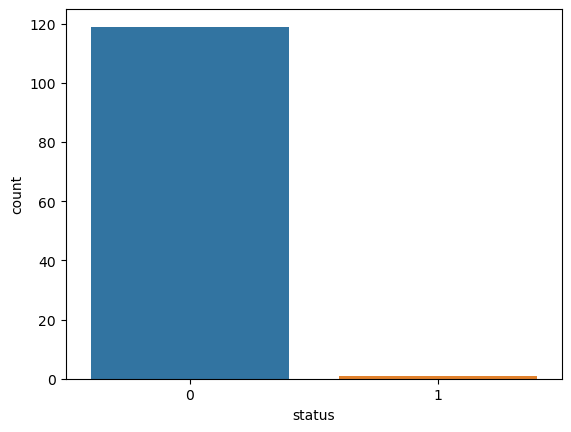

In [53]:
sns.countplot(df['status'])

 in this we can clearly see that moajority of startup companies will get closed immidetely only  few startup will progress

In [54]:
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
4,1002,CA,37.779281,-122.419236,94105,c:65806,0,0.0000,1.6685,0.0384,...,c:65806,1,1,0,0,0,0,1.0,1,0
5,379,CA,37.406914,-122.090370,94043,c:22898,0,4.5452,4.5452,5.0027,...,c:22898,0,0,0,1,0,0,3.0,1,0
30,355,CA,37.422859,-122.045217,94035,c:21492,0,1.3534,2.1644,4.5178,...,c:21492,0,0,1,1,0,0,2.0,1,0
35,785,NY,40.739010,-73.997259,10011,c:45111,0,2.6575,2.6575,0.0000,...,c:45111,0,0,0,1,0,0,1.0,1,0
60,617,MA,42.546483,-71.173667,1887,c:35157,0,2.7836,10.9507,-1.9151,...,c:35157,0,0,0,1,0,0,2.0,1,0


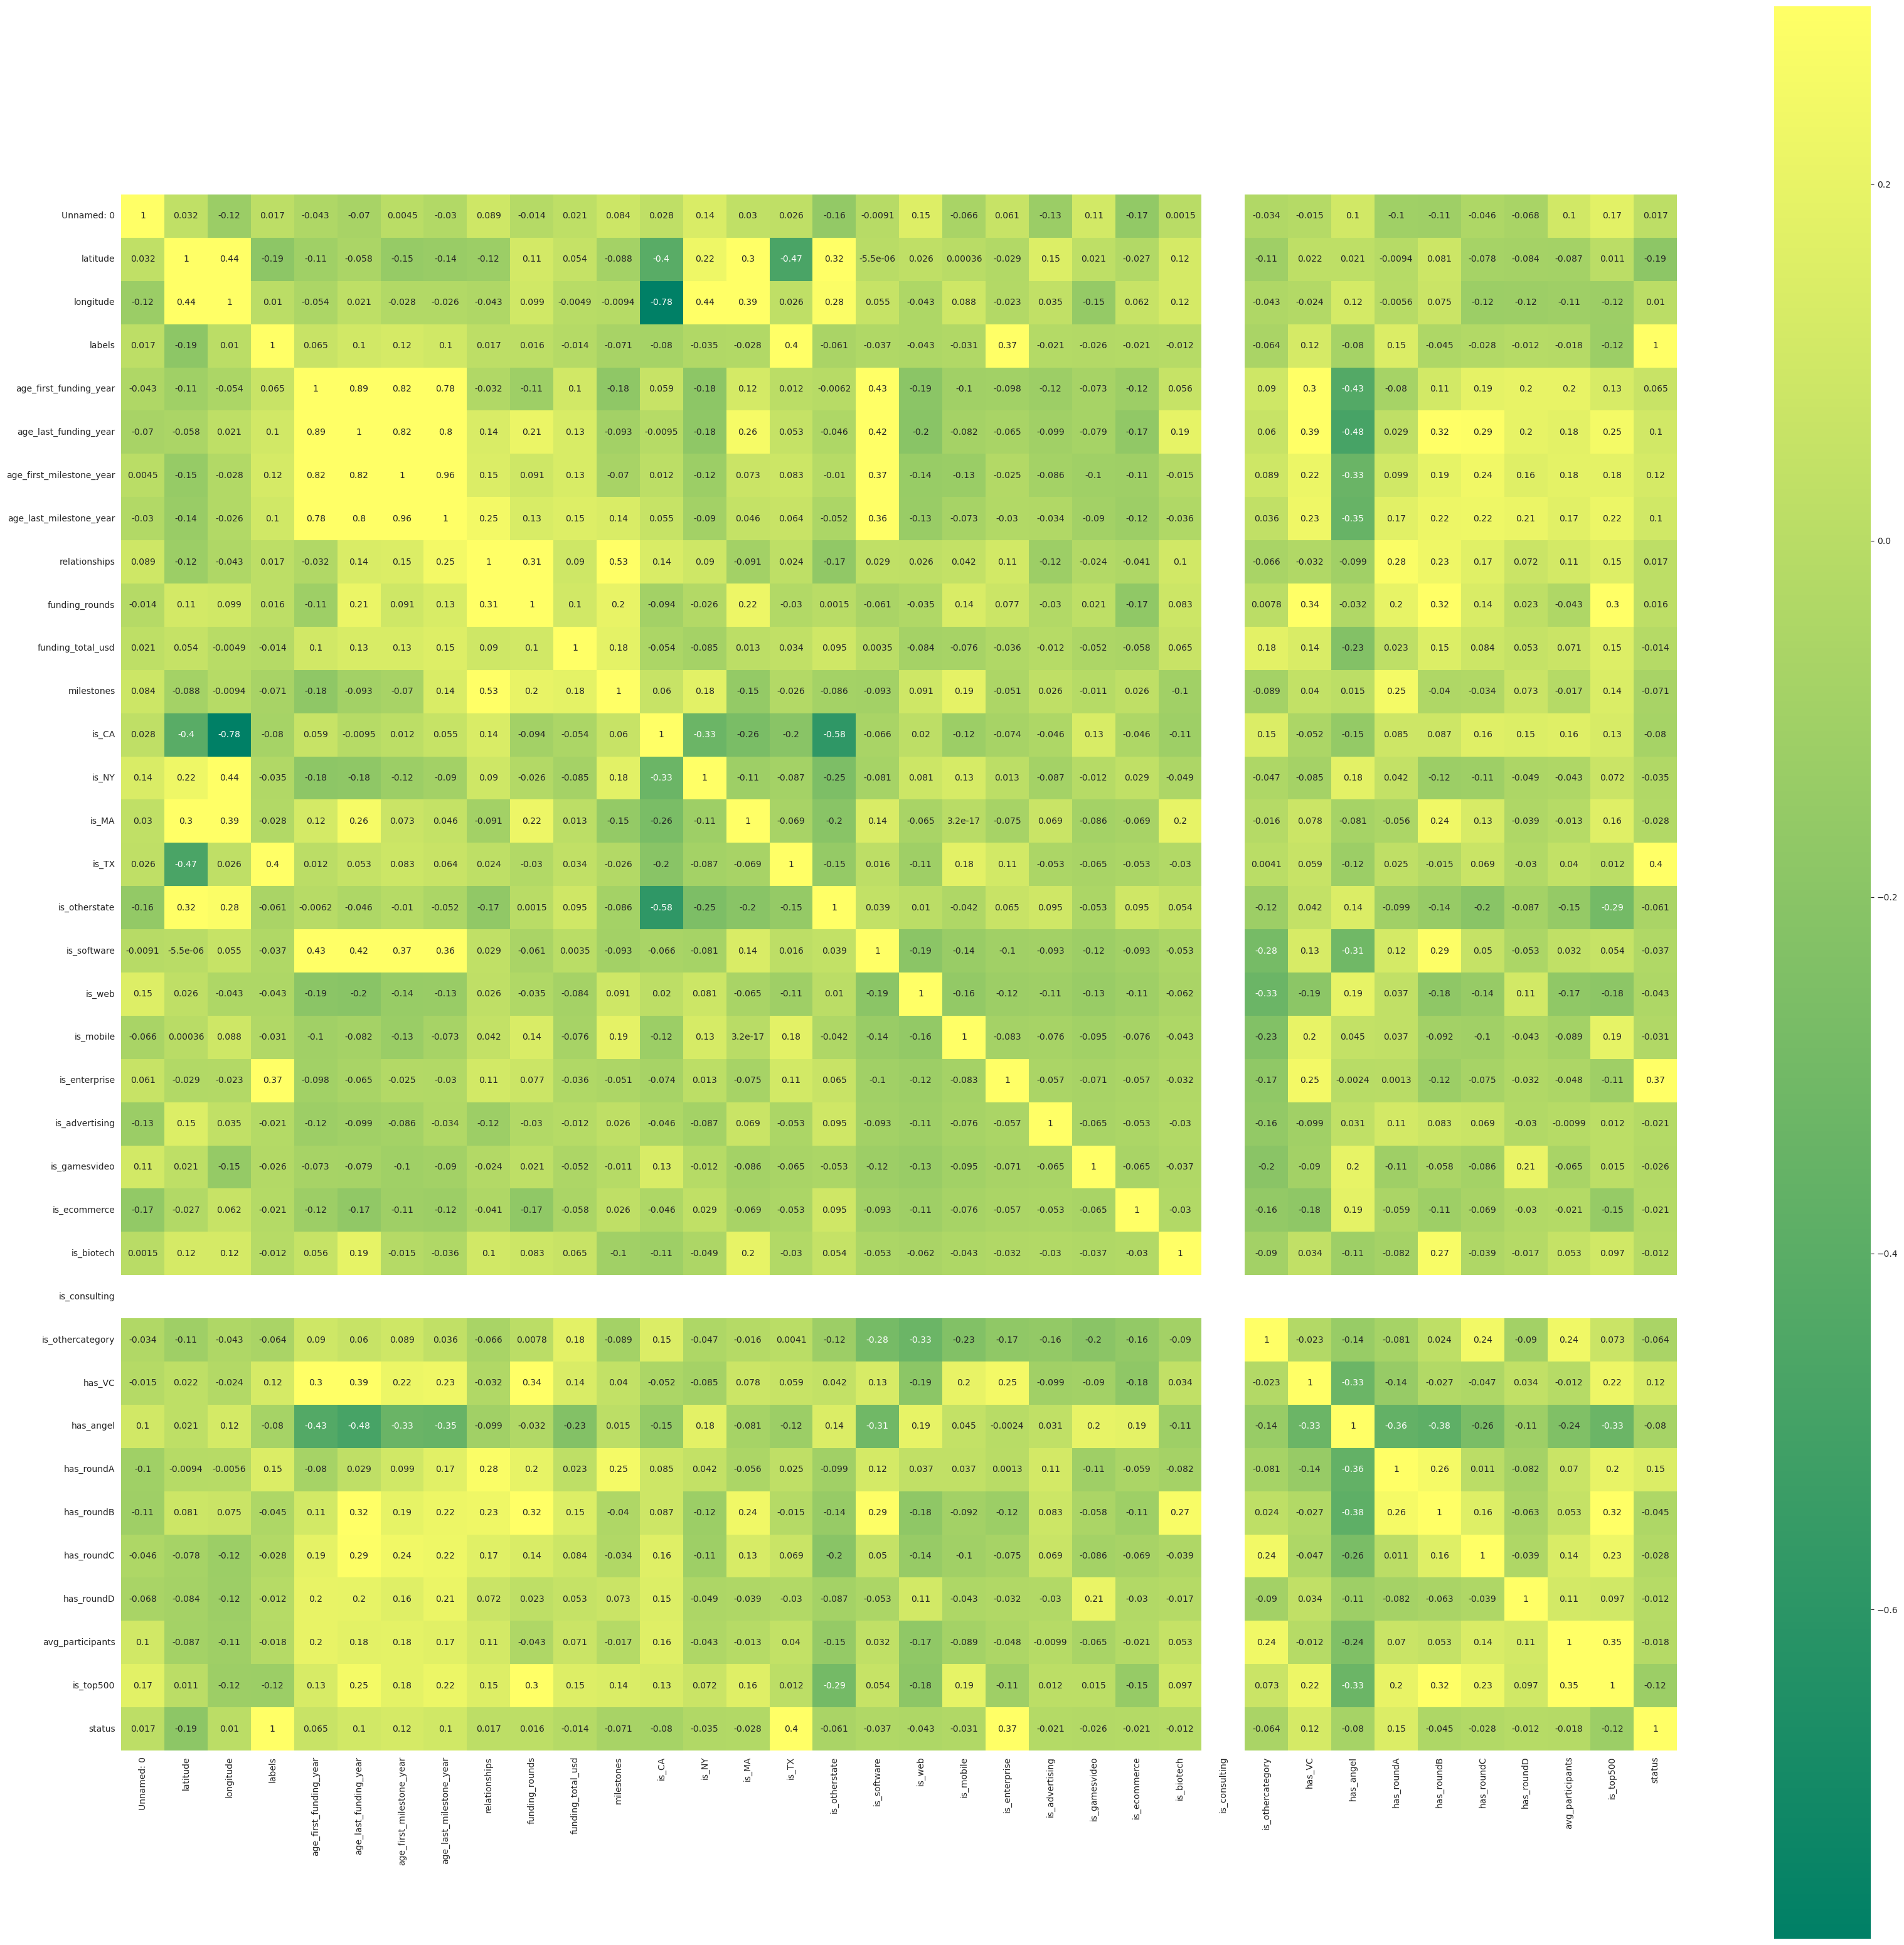

In [20]:
corr =df.corr()
mask = np.zeros_like(corr)
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(40, 40))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,cmap='summer',annot=True)

In [55]:
df.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'labels', 'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'state_code.1',
       'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 'category_code',
       'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

# Split the dataset

In [70]:
x = df[['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year',
       'relationships','funding_rounds','funding_total_usd','milestones','has_VC','has_angel',
       'has_roundA','has_roundB','has_roundC','has_roundD','avg_participants','is_top500']]
y = df['status']

# train test split

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

# scalling the dataset

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
scaler = StandardScaler()

In [80]:
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [81]:
x_train

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
346,9.3534,12.4055,7.0055,11.3836,9,3,30300000,2,1,0,0,0,0,1,4.5,1
128,2.3178,4.2356,-0.3342,-0.3342,2,2,10600000,1,1,0,0,1,0,0,3.0,1
152,0.2493,0.2493,0.0000,0.7781,1,1,20000,2,0,1,0,0,0,0,1.0,0
876,5.7836,5.7836,2.0027,2.0027,1,1,10000000,1,1,0,0,0,0,0,3.0,1
613,2.0027,3.0027,2.0877,4.0685,7,2,2000000,3,1,1,0,0,0,0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,0.4658,1.2247,0.0000,1.2247,5,2,300000,2,0,1,0,1,0,0,2.0,1
134,1.8329,1.8329,1.7479,1.7479,4,1,690000,1,0,1,0,0,0,0,3.0,1
711,4.8082,4.8082,6.6027,6.7233,4,1,35000000,2,0,0,0,0,0,1,3.0,1
426,0.2466,1.0000,1.1616,1.1616,3,5,185000,1,1,1,0,0,0,0,2.0,1


# building model

# Random forest classifier

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
RF_clas = RandomForestClassifier()
RF_clas

RandomForestClassifier()

In [74]:
RF_model = RF_clas.fit(x_train, y_train)
RF_model

RandomForestClassifier()

In [110]:
RF_pred = RF_model.predict(x_test)
RF_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [ ]:
#confusion metrix

In [94]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [95]:
pd.crosstab(y_test, RF_pred, rownames = ['Actual'], colnames = ['Predicted'], margins = True)

Predicted,0,All
Actual,,
0,23,23
1,1,1
All,24,24


In [97]:
confusion_matrix(y_test,RF_pred)

array([[23,  0],
       [ 1,  0]], dtype=int64)

In [108]:
# accuracy_score

RF_accuracy = accuracy_score(y_test, RF_pred)
RF_accuracy

0.9583333333333334